<a href="https://colab.research.google.com/github/RajkumarGalaxy/StructuredData/blob/master/Goodness_of_Fit_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goodness-of-Fit Test


One of the traditional statistical approaches, the Goodness-of-Fit test gives a solution to validate our theoretical assumptions about data distributions. 
This notebook discusses the Goodness-of-Fit test with some common data distributions using Python code.

In [24]:
# create the environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

# Uniform Distribution

In [9]:
path = 'https://raw.githubusercontent.com/RajkumarGalaxy/dataset/master/Tabular/uniform_dice.csv'
dice = pd.read_csv(path)
dice

,face,observed
0,1,17
1,2,11
2,3,18
3,4,12
4,5,15
5,6,17


In [14]:
# Total frequency
total_freq = dice['observed'].sum()
print('Total Frequency : ', total_freq)

# Expected frequency
expected_freq = total_freq / 6
print('Expected Frequency : ', expected_freq)

Total Frequency :  90
Expected Frequency :  15.0


In [16]:
dice['expected'] = expected_freq
dice

,face,observed,expected
0,1,17,15.0
1,2,11,15.0
2,3,18,15.0
3,4,12,15.0
4,5,15,15.0
5,6,17,15.0


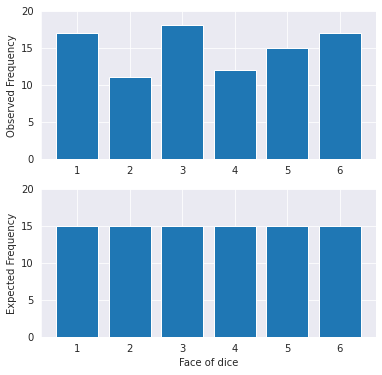

In [39]:
sns.set_style('darkgrid')
plt.figure(figsize = (6,6))

# plot observed frequency
plt.subplot(211)
plt.bar(dice['face'], dice['observed'])
plt.ylabel('Observed Frequency')
plt.ylim([0,20])

# plot expected frequency
plt.subplot(212)
plt.bar(dice['face'], dice['expected'])
plt.ylabel('Expected Frequency')
plt.xlabel('Face of dice')
plt.ylim([0,20])
plt.show()

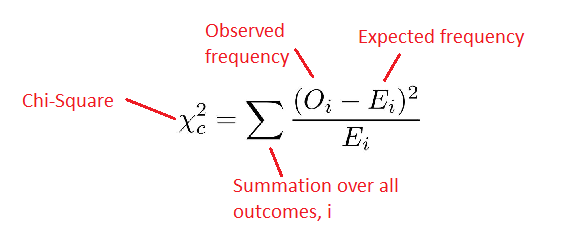

In [42]:
# a helper function to calculate the Chi-Square value

def Chi_Square(obs_freq, exp_freq):
  count = len(obs_freq)
  chi_sq = 0

  for i in range(count):
    x = (obs_freq[i] - exp_freq[i]) ** 2
    x = x / exp_freq[i]
    chi_sq += x

  return chi_sq


In [43]:
# calculate using the helper function
Chi_Square(dice['observed'], dice['expected'])

2.8

In [45]:
# calculate using the stats module of SciPy library
stats.chisquare(dice['observed'], dice['expected'])

Power_divergenceResult(statistic=2.8, pvalue=0.7307864865887586)

In [48]:
# critical Chi-Square - percent point function
DOF = len(dice['observed']) - 0 - 1
stats.chi2.ppf(0.95, DOF)

11.070497693516351

We can say that the data follows uniform distribution.

# Normal Distribution

In [99]:
path = 'https://raw.githubusercontent.com/RajkumarGalaxy/dataset/master/Tabular/bulb_life.csv'
data = pd.read_csv(path)
data.head(10)

,bulb,life
0,1,31
1,2,33
2,3,34
3,4,51
4,5,24
5,6,41
6,7,58
7,8,53
8,9,27
9,10,52


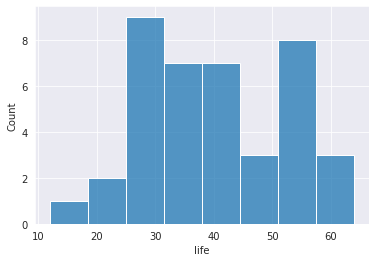

In [101]:
sns.histplot(data=data, x='life', bins=8)
plt.show()

In [104]:
# mean and standard deviation of given data
mean = np.mean(data['life'])
std = np.std(data['life'])

bins = 8
interval = []
for i in range(1,9):
  val = stats.norm.ppf(i/bins, mean, std)
  interval.append(val)
interval

[26.056476255663902,
 31.762378497044118,
 36.02928282685201,
 39.85,
 43.67071717314799,
 47.937621502955885,
 53.6435237443361,
 inf]

In [106]:
interval.insert(0, -np.inf)
interval

[-inf,
 26.056476255663902,
 31.762378497044118,
 36.02928282685201,
 39.85,
 43.67071717314799,
 47.937621502955885,
 53.6435237443361,
 inf]

In [107]:
df = pd.DataFrame({'lower_limit':interval[:-1], 'upper_limit':interval[1:]})
df

,lower_limit,upper_limit
0,-inf,26.056476
1,26.056476,31.762378
2,31.762378,36.029283
3,36.029283,39.850000
4,39.850000,43.670717
5,43.670717,47.937622
6,47.937622,53.643524
7,53.643524,inf


In [113]:
life_values = list(sorted(data['life']))
df['obs_freq'] = df.apply(lambda x:sum([i>x['lower_limit'] and i<=x['upper_limit'] for i in life_values]), axis=1)
df['exp_freq'] = 5
df

,lower_limit,upper_limit,obs_freq,exp_freq
0,-inf,26.056476,4,5
1,26.056476,31.762378,8,5
2,31.762378,36.029283,6,5
3,36.029283,39.850000,2,5
4,39.850000,43.670717,6,5
5,43.670717,47.937622,2,5
6,47.937622,53.643524,6,5
7,53.643524,inf,6,5


In [114]:
stats.chisquare(df['obs_freq'], df['exp_freq'])

Power_divergenceResult(statistic=6.4, pvalue=0.4938946499688296)

In [115]:
p = 2    # number of parameters
DOF = len(df['obs_freq']) - p -1
stats.chi2.ppf(0.95, DOF)


11.070497693516351

It is observed that the calculated Chi-Square value is less than the critical value. Hence, the null hypothesis can not be rejected. In other words, the life of bulbs are normally distributed.


## Thank you for your time!